In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
1

1

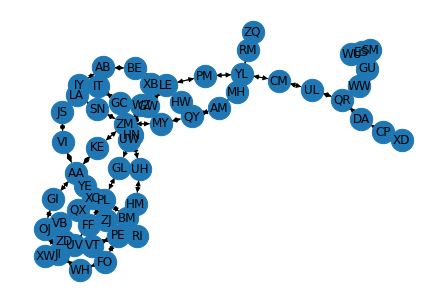

In [167]:
vals = []
with open('./input.txt', 'r') as file:
    for line in file:
        vals.append(line.strip())
        
vals[:5]

layout = {}
for val in vals:
    start = val.split(' ')[1]
    rate = int(val.split(' ')[4].split('=')[-1][:-1])
    valves = val.split('valve')[-1][1:]
    if len(valves)>2:
        valves = valves[1:]
        valves=[valves[i:i+2] for i in range(0,len(valves),4)]
    else:
        valves = [valves,]
    layout[start] = {
        'rate':rate,
        'valves':valves
    }
    
G = nx.DiGraph()
cool = []
for l in layout:
    for valves in layout[l]['valves']:
        cool.append((l,valves))
G.add_edges_from(cool)   
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
plt.show()    

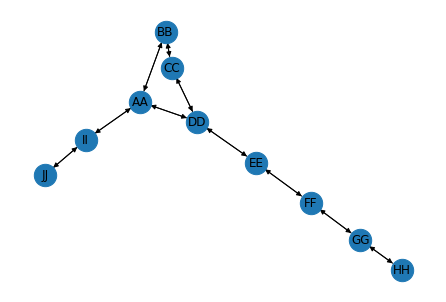

In [148]:
test ='''Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II'''

vals = []
for line in test.split('\n'):
    vals.append(line.strip())

vals[:5]

layout = {}
for val in vals:
    start = val.split(' ')[1]
    rate = int(val.split(' ')[4].split('=')[-1][:-1])
    valves = val.split('valve')[-1][1:]
    if len(valves)>2:
        valves = valves[1:]
        valves=[valves[i:i+2] for i in range(0,len(valves),4)]
    else:
        valves = [valves,]
    layout[start] = {
        'rate':rate,
        'valves':valves
    }

G = nx.DiGraph()
cool = []
for l in layout:
    for valves in layout[l]['valves']:
        cool.append((l,valves))
G.add_edges_from(cool)   
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
plt.show()

In [168]:
def explore(status, time_remaining, pressure, current, previous,best_p,waiting):

    if time_remaining <= 0:
        return np.max([pressure, best_p])
    
    rate = 0
    for v in status:
        rate += layout[v]['rate']
        
    if waiting == 1:
        rate -= layout[status[-1]]['rate']
        
    # Test to see if a better score is even possible (given the top 2 are 24 & 25)
    tr = time_remaining
    r = rate
    tp = pressure
    while tr > 0:
        tr -= 1
        tp += r
        r += 25
        tr -= 1
        tp += r
    if tp < best_p:
        return best_p
        
    if waiting == 1:
        valves=[current,]
        current=previous
    else:
        valves = layout[current]['valves']
    
    for valve in valves:
        if len(layout[current]['valves'])>1 and valve==previous:
            continue
            
        if layout[valve]['rate'] > 0  and valve not in status: 

            new_p = explore(status=status+[valve],
                            time_remaining=time_remaining-1,
                            pressure=pressure+rate,
                            current=valve,
                            previous=current,
                            best_p=best_p,
                            waiting=1)

            best_p = np.max([new_p, best_p])


        new_p = explore(status=status,
                        time_remaining=time_remaining-1,
                        pressure=pressure+rate,
                        current=valve,
                        previous=current,
                        best_p=best_p,
                        waiting =0)

        best_p = np.max([new_p, best_p])

    return np.max([pressure, best_p])
    

In [169]:

time_remaining = 30
current_loc = 'AA'
pressure = 0

best_pressure = 0
explore([], time_remaining, pressure, current_loc, '', best_pressure,0)


2265

In [ ]:
1651 is dummy answer
2265 is real  answer

In [170]:
import itertools
time_remaining = 26
current_loc = 'AA'
pressure = 0

best_pressure = 0
explore2(status=[], 
         time_remaining=time_remaining, 
         pressure=pressure, 
         my_current=current_loc, 
         my_previous='', 
         best_p=best_pressure,
         e_current='AA',
         e_previous='',
         waiting=0)


1105
1149
1166
1174
1218
1226
1245
1270
1276
1300
1338
1363
1366
1391
1401
1412
1440
1464
1492
1502
1505
1529
1565
1593
1596
1599
1604
1607
1640
1658
1714
1744
1766
1794
1804
1840
1868
1879
1909
1937
1960
1983
1988
2006
2062
2102
2175
2247
2272
2284
2302
2303
2341
2417
2432
2441
2446
2463
2485
2507
2548
2554
2557
2563
2567
2579
2588
2589
2606
2615
2618
2622
2665
2674
2688
2700
2709
2711
2737
2741
2782
2791
2802
2811


2811

In [171]:
1

1

In [ ]:
1707 is dummy answer
2811 is correct

In [165]:
def explore2(status, time_remaining, pressure, my_current, my_previous, best_p, e_current, e_previous, waiting):

    if time_remaining == 0:
        if pressure > best_p:
            print(pressure)
        return np.max([pressure, best_p])
    
    elif time_remaining < 0:
        assert 3==2, "bad timing"
    
    rate = 0
    for v in status:
        rate += layout[v]['rate']
        
    if waiting == 1 or waiting == 2:
        rate -= layout[status[-1]]['rate']   
    elif waiting == 3:
        rate -= (layout[status[-2]]['rate'] + layout[status[-1]]['rate'])
    
    #temp_status = status
    #temp_everything = everything[~everything.index.isin(temp_status)]
    # Test to see if a better score is even possible (given the max valve is 25)
    
    tr = time_remaining
    r = rate
    tp = pressure
    while tr > 0:
        tr -= 1
        tp += r
        if tr == 0:
            break
        r += 48#temp_everything.max()   
        tr -= 1
        tp += r
    if tp < best_p:
        return best_p
        
        
    if waiting == 1: # person waiting
        e_valves = layout[e_current]['valves']
        my_valves = [my_current,] * len(e_valves)
        my_current = my_previous
        waiting = 0

    elif waiting == 2: #e waiting
        my_valves = layout[my_current]['valves']
        e_valves = [e_current,] * len(my_valves)
        e_current = e_previous
        waiting = 0
    elif waiting == 3: #both waiting
        e_valves = [e_current,]
        my_valves = [my_current,]        
        my_current = my_previous
        e_current = e_previous
        waiting = 0            
    else:
        my_valves, e_valves = np.array([(my, ev) for my,ev in itertools.product(layout[my_current]['valves'], layout[e_current]['valves'][::-1])]).T
        
    assert len(my_valves)==len(e_valves), "differnt amoutn"
    
    for my_valve, e_valve in zip(my_valves, e_valves):
    
        if len(set(layout[my_current]['valves'])) >1 and my_valve==my_previous:
            continue
                    
        if len(set(layout[e_current]['valves'])) > 1 and e_valve==e_previous:
            continue            
        
            
        # person open, e open
        if layout[my_valve]['rate'] > 0 and my_valve not in status and \
           layout[e_valve]['rate']  > 0 and e_valve  not in status and \
           my_valve != e_valve:

            new_p = explore2(status=status+[my_valve]+[e_valve],
                            time_remaining=time_remaining-1,
                            pressure=pressure+rate,
                            my_current=my_valve,
                            my_previous=my_current,
                            best_p=best_p,
                            e_current=e_valve,
                            e_previous=e_current,
                            waiting=3)

            best_p = np.max([new_p, best_p])
                # person open, e move
        if layout[my_valve]['rate'] > 0 and my_valve not in status: 

            new_p = explore2(status=status+[my_valve],
                            time_remaining=time_remaining-1,
                            pressure=pressure+rate,
                            my_current=my_valve,
                            my_previous=my_current,
                            best_p=best_p,
                            e_current=e_valve,
                            e_previous=e_current,
                            waiting=1)

            best_p = np.max([new_p, best_p])
             # person move, e open
        if layout[e_valve]['rate'] > 0 and e_valve not in status:

            new_p = explore2(status=status+[e_valve],
                            time_remaining=time_remaining-1,
                            pressure=pressure+rate,
                            my_current=my_valve,
                            my_previous=my_current,
                            best_p=best_p,
                            e_current=e_valve,
                            e_previous=e_current,
                            waiting=2)

            best_p = np.max([new_p, best_p])

        new_p = explore2(status=status,
                        time_remaining=time_remaining-1,
                        pressure=pressure+rate,
                        my_current=my_valve,
                        my_previous=my_current,
                        best_p=best_p,
                        e_current=e_valve,
                        e_previous=e_current,
                        waiting=0)

        best_p = np.max([new_p, best_p])

    return np.max([pressure, best_p])
    